Считаем файл


2.1 2 2
Date
2019-04-05 14:00:00    831.157
2019-04-05 14:10:00    807.921
2019-04-05 14:20:00    722.121
2019-04-05 14:30:00    735.386
2019-04-05 14:40:00    902.545
                        ...   
2019-04-12 13:10:00    235.294
2019-04-12 13:20:00    469.788
2019-04-12 13:30:00    464.807
2019-04-12 13:40:00    343.407
2019-04-12 13:50:00    180.683
Name: VES1, Length: 1008, dtype: float64


<AxesSubplot:xlabel='Date'>

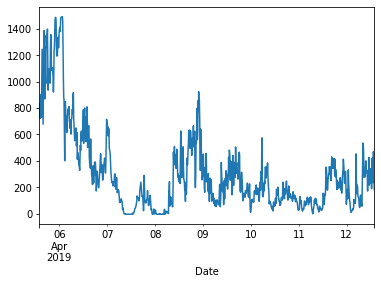

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


print(2.1, 2,2)
DF=pd.read_csv('VES_FinalDataset.csv',
                        sep=';',
                        decimal=',',
                        encoding='latin1',
                        parse_dates=['Date'],
                        dayfirst=True,
                        index_col='Date')

print(DF['VES1'])
DF['VES1']=pd.to_numeric(DF['VES1'])
DF['VES2']=pd.to_numeric(DF['VES2'])
plt.figure()
DF['VES1'].plot()

Уход от отирицательных значений активной мощности


<AxesSubplot:xlabel='Date'>

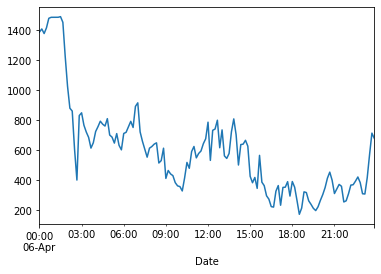

In [44]:
DF[DF < 0] = 0
print()
DF['VES1'][60:204].plot()

Проверка минимального значения

In [45]:
import numpy as np

print(np.nanmin(DF['VES2']))


0.0


### Начало работы с алгоритмами оптимизации

##### Фильтр Ходрика Прескотта

<AxesSubplot:xlabel='Date'>

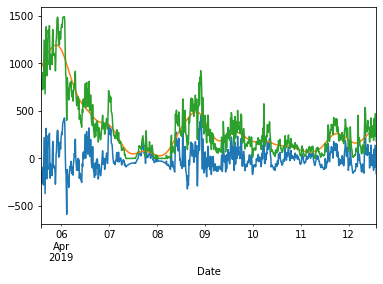

In [46]:
import statsmodels.api as sm

HP_cycle, HP_trend = sm.tsa.filters.hpfilter(DF['VES1'], lamb=129600)

HP_cycle.plot()
HP_trend.plot()
DF['VES1'].plot()